In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
data = pd.read_csv('telecom_churn.csv')
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [4]:
data.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data = pd.get_dummies(data)

In [7]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [12]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, confusion_mat


In [13]:
def plot_confusion_matrix(confusion_mat, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

In [14]:
logistic_accuracy, logistic_precision, logistic_recall, logistic_f1, logistic_confusion_mat = evaluate_model(logistic_model, X_test_scaled, y_test)

In [15]:
print("Logistic Regression Model:")
print("Accuracy:", logistic_accuracy)
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("F1 Score:", logistic_f1)
print("Confusion Matrix:\n", logistic_confusion_mat)


Logistic Regression Model:
Accuracy: 0.8590704647676162
Precision: 0.6206896551724138
Recall: 0.1782178217821782
F1 Score: 0.27692307692307694
Confusion Matrix:
 [[555  11]
 [ 83  18]]


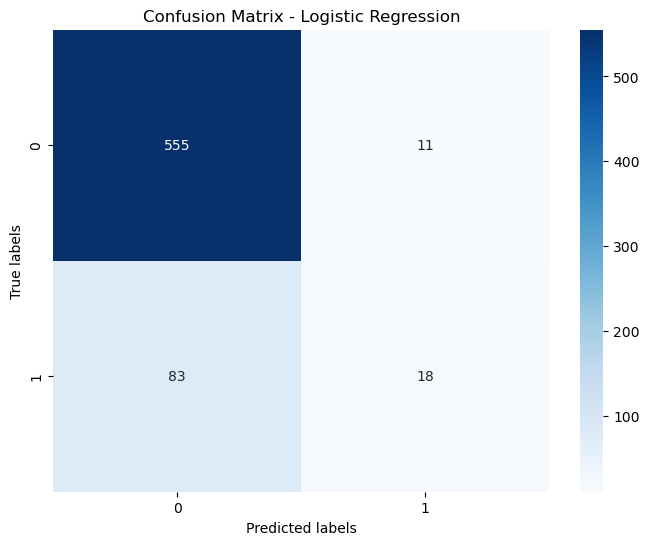

In [16]:
plot_confusion_matrix(logistic_confusion_mat, 'Confusion Matrix - Logistic Regression')

In [17]:
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_confusion_mat = evaluate_model(rf_model, X_test_scaled, y_test)
print("\nRandom Forest Classifier Model:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Confusion Matrix:\n", rf_confusion_mat)



Random Forest Classifier Model:
Accuracy: 0.9250374812593704
Precision: 0.8493150684931506
Recall: 0.6138613861386139
F1 Score: 0.7126436781609196
Confusion Matrix:
 [[555  11]
 [ 39  62]]


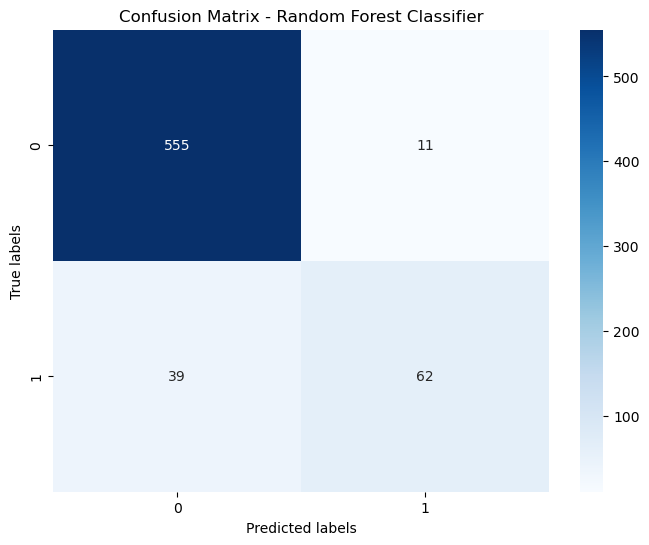

In [18]:
plot_confusion_matrix(rf_confusion_mat, 'Confusion Matrix - Random Forest Classifier')

In [19]:
models = ['Logistic Regression', 'Random Forest Classifier']
accuracy_scores = [logistic_accuracy, rf_accuracy]
precision_scores = [logistic_precision, rf_precision]
recall_scores = [logistic_recall, rf_recall]
f1_scores = [logistic_f1, rf_f1]

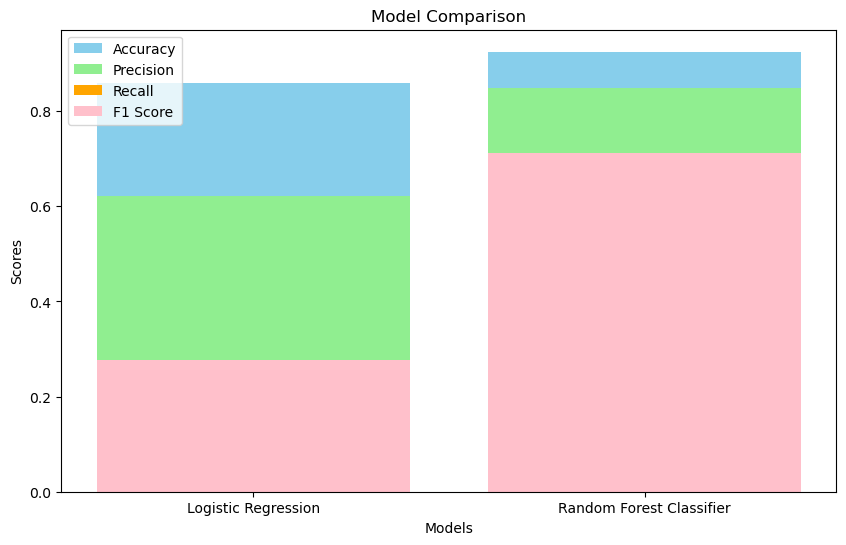

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='skyblue', label='Accuracy')
plt.bar(models, precision_scores, color='lightgreen', label='Precision')
plt.bar(models, recall_scores, color='orange', label='Recall')
plt.bar(models, f1_scores, color='pink', label='F1 Score')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison')
plt.legend()
plt.show()

In [21]:
def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

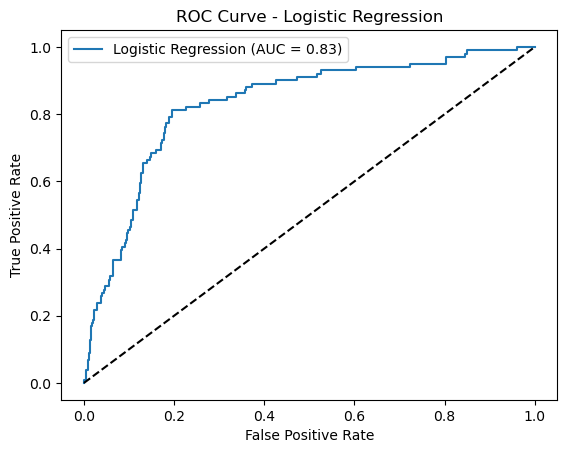

In [22]:
plot_roc_curve(logistic_model, X_test_scaled, y_test, 'Logistic Regression')


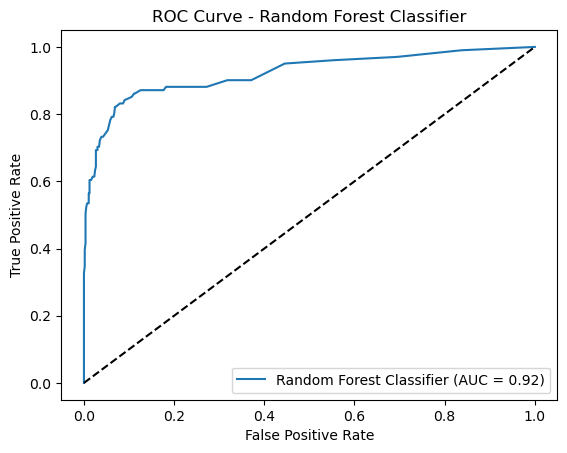

In [23]:
plot_roc_curve(rf_model, X_test_scaled, y_test, 'Random Forest Classifier')

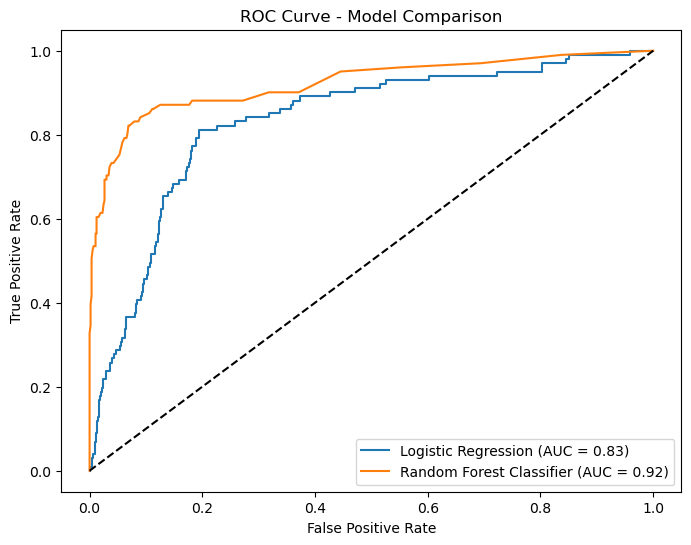

In [24]:
plt.figure(figsize=(8, 6))

y_pred_proba_logistic = logistic_model.predict_proba(X_test_scaled)[:,1]
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_proba_logistic)
auc_score_logistic = roc_auc_score(y_test, y_pred_proba_logistic)
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {auc_score_logistic:.2f})')

y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest Classifier (AUC = {auc_score_rf:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Comparison')
plt.legend()
plt.show()


In [25]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance for Random Forest Classifier:\n", feature_importance)


Feature Importance for Random Forest Classifier:
            Feature  Importance
5          DayMins    0.187269
7    MonthlyCharge    0.175630
4    CustServCalls    0.141136
8       OverageFee    0.101938
9         RoamMins    0.093166
1  ContractRenewal    0.077439
3        DataUsage    0.070367
0     AccountWeeks    0.063195
6         DayCalls    0.061322
2         DataPlan    0.028539
